In [3]:
from keras.layers import Dense
from keras.activations import sigmoid, relu
from keras.optimizer_v1 import sgd
from keras.losses import binary_crossentropy
from keras.models import Sequential

In [21]:
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt

In [101]:
x, y = make_gaussian_quantiles(n_features=2, n_classes=2, random_state=42)

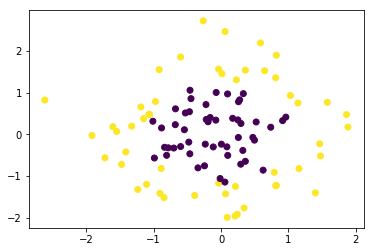

In [102]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [134]:
model = Sequential()
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [135]:
model.compile(loss=binary_crossentropy, optimizer='sgd', metrics=["acc"])

In [136]:
model.fit(x, y, epochs=1)

4/4 [==============================] - 0s 2ms/step - loss: 0.6890 - acc: 0.4800


In [106]:
xx, yy = np.meshgrid(np.arange(-3,3, 0.1), np.arange(-3,3,0.1))

In [107]:
mesh_points = np.concatenate([xx.reshape(-1,1), yy.reshape(-1,1)], axis=1)

In [108]:
preds = (model.predict(mesh_points) >= 0.5).astype("int")

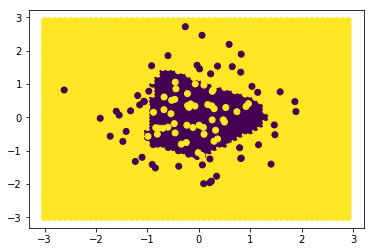

In [109]:
plt.scatter(mesh_points[:, 0], mesh_points[:, 1], c=preds.reshape(-1))
plt.scatter(x[:, 0], x[:, 1], c=(y==0))
plt.show()

In [130]:
from keras.models import Model

In [137]:
model1 = Model(inputs=[model.input], outputs=[model.layers[-2].output])

In [138]:
preds1 = model1.predict(x)

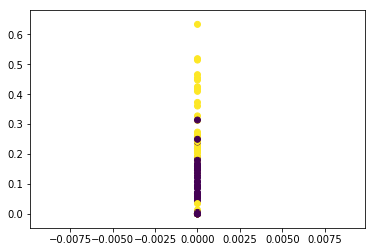

In [139]:
plt.scatter(preds1[:, 0], preds1[:, 1], c=y)
plt.show()